In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # Embaralha os dados antes de separar em treino e teste

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Y_train


array([8, 0, 1, ..., 0, 6, 8])

In [36]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

# acho que está errado
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # aqui parece ter um erro, mas acho que é bug
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [37]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteração: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [38]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500) # tem hora que funciona e tem hora que não (provável é bug do colab)

Iteração:  0
[0 0 9 ... 4 0 5] [8 0 1 ... 0 6 8]
0.09995121951219513
Iteração:  10
[8 3 1 ... 4 0 7] [8 0 1 ... 0 6 8]
0.1901219512195122
Iteração:  20
[8 0 1 ... 0 0 9] [8 0 1 ... 0 6 8]
0.2748048780487805
Iteração:  30
[8 0 1 ... 0 0 9] [8 0 1 ... 0 6 8]
0.3483414634146341
Iteração:  40
[5 0 1 ... 0 0 9] [8 0 1 ... 0 6 8]
0.4224390243902439
Iteração:  50
[8 0 1 ... 0 0 9] [8 0 1 ... 0 6 8]
0.4876829268292683
Iteração:  60
[8 0 1 ... 0 0 9] [8 0 1 ... 0 6 8]
0.5389512195121952
Iteração:  70
[5 0 1 ... 0 0 9] [8 0 1 ... 0 6 8]
0.5791463414634146
Iteração:  80
[5 0 1 ... 0 0 9] [8 0 1 ... 0 6 8]
0.6102439024390244
Iteração:  90
[5 0 1 ... 0 0 9] [8 0 1 ... 0 6 8]
0.6337560975609756
Iteração:  100
[5 0 1 ... 0 0 9] [8 0 1 ... 0 6 8]
0.6548780487804878
Iteração:  110
[8 0 1 ... 0 0 9] [8 0 1 ... 0 6 8]
0.6717317073170732
Iteração:  120
[8 0 1 ... 0 0 9] [8 0 1 ... 0 6 8]
0.6864634146341464
Iteração:  130
[8 0 1 ... 0 0 9] [8 0 1 ... 0 6 8]
0.6995853658536585
Iteração:  140
[8 0 1 ... 0 0 

In [47]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Previsão: ", prediction)
    print("Etiqueta: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.imshow(current_image,cmap="gray")
    plt.axis('off')
    plt.show()

Previsão:  [8]
Etiqueta:  8


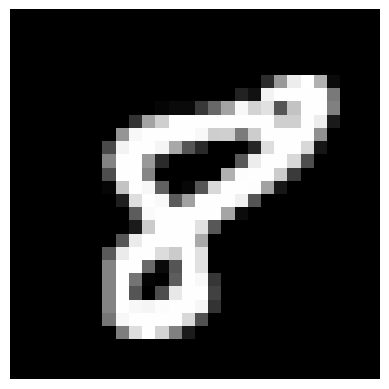

Previsão:  [0]
Etiqueta:  0


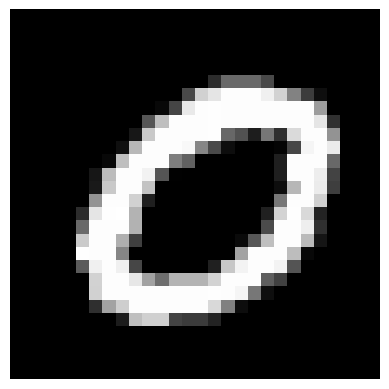

Previsão:  [1]
Etiqueta:  1


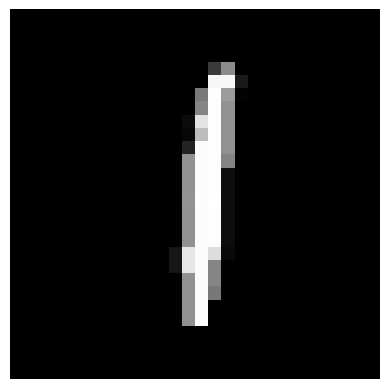

Previsão:  [8]
Etiqueta:  2


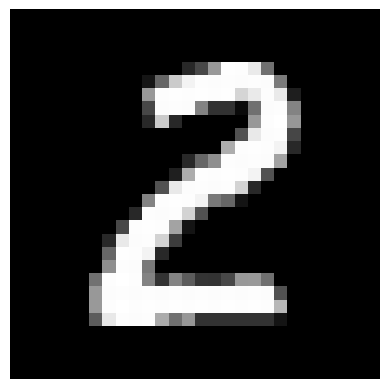

In [48]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)